In [1]:
import scipy.optimize as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing
data=pd.read_csv('ex2data1.txt',header=None)


In [3]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
#assigning values
X=data.values[:,:2];
X=np.c_[np.ones((X.shape[0],1)),X]
y=data.values[:,2].reshape(X.shape[0],1)

In [5]:
X[:10,:]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331]])

In [6]:
y[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]])

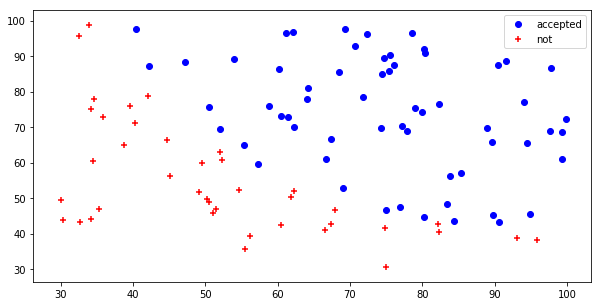

In [7]:
#plotting accepted vs non aceppted
accepted=data.values[data.values[:,2]==1]
not_accepted=data.values[data.values[:,2]==0]
plt.figure(figsize=(10,5))
plt.scatter(accepted[:,0],accepted[:,1],c='blue',marker='o',label="accepted")
plt.scatter(not_accepted[:,0],not_accepted[:,1],c='red',marker='+',label="not")
plt.legend()
plt.show()

In [8]:
#sigmoid function
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [9]:
#cost function
def cost(theta,X,y):
    h=sigmoid(X.dot(theta))
    m=y.shape[0]
    j=-(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    grad=(1/m)*X.T.dot(h-y)
    return j

In [21]:
#callable cost for a optimiyzing tgeta later
def callable_cost():
    return cost(X,y,theta_initial)

In [22]:

theta_initial = np.zeros(X.shape[1]).reshape(-1,1)
#j,grad=cost(X,y,theta_initial)

In [23]:
theta_initial=theta_initial.reshape(3,1)

In [24]:
theta_initial

array([[0.],
       [0.],
       [0.]])

In [25]:
theta_opt =sp.fmin(cost, x0=theta_initial, args=(X, y), maxiter=500, full_output=True)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [26]:
theta_opt[0]

array([-25.16130062,   0.20623142,   0.20147143])